# Haberman's Survival Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv('haberman.csv',header=None,names=['Age','operation_years','axillary_nodes','survival_status'])
df.head(5)

,Age,operation_years,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [19]:
#how many features
print(df.shape)

(306, 4)


In [20]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                306 non-null int64
operation_years    306 non-null int64
axillary_nodes     306 non-null int64
survival_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


In [21]:
#column names
print(df.columns)
df.head()

Index(['Age', 'operation_years', 'axillary_nodes', 'survival_status'], dtype='object')


,Age,operation_years,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [24]:
def class_label(x):
    if x==1:
        return 'yes'
    else:
        return 'no'

df['survival_status']=df[['survival_status']].applymap(lambda x:class_label(x))
#edit the survival class as per some meaningfull class
#df['survival_status']=df['survival_status'].map({1:"yes",2:"no"})
#df['survival_status']=df['survival_status'].astype('category')
print(df.head(5))


   Age  operation_years  axillary_nodes survival_status
0   30               64               1             yes
1   30               62               3             yes
2   30               65               0             yes
3   31               59               2             yes
4   31               65               4             yes


In [31]:
df.survival_status.value_counts()

yes    225
no      81
Name: survival_status, dtype: int64

# Objective


In this deta set we have given the patient'Age', operation 'year' and Number of positive axillary 'nodes' detected and we have to predict that the patient will survive after 5 years based on the given data set.

# Univariate Analysis

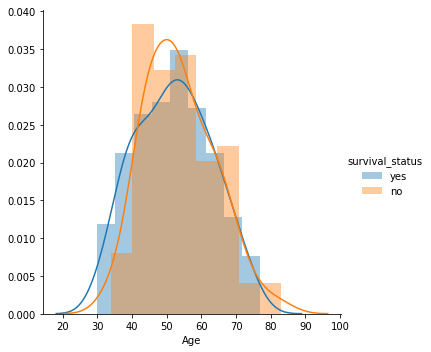

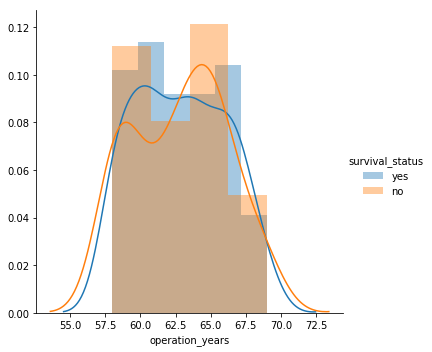

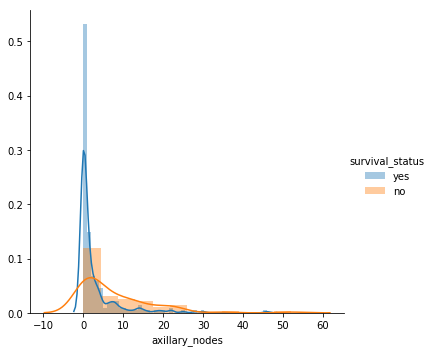

In [34]:
#PDF
fig=sns.FacetGrid(df,hue="survival_status",height=5)
fig.map(sns.distplot,"Age")
fig.add_legend()
plt.show()
fig=sns.FacetGrid(df,hue="survival_status",height=5)
fig.map(sns.distplot,"operation_years")
fig.add_legend()
plt.show()
fig=sns.FacetGrid(df,hue="survival_status",height=5)
fig.map(sns.distplot,"axillary_nodes")
fig.add_legend()
plt.show()


# Bi-variate Analysis

2-D Scatter Plot

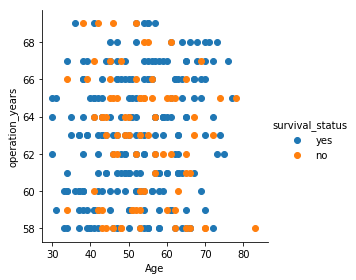

In [36]:
fig=sns.FacetGrid(df,hue="survival_status",height=4)
fig.map(plt.scatter,'Age','operation_years')
fig.add_legend()
plt.show()

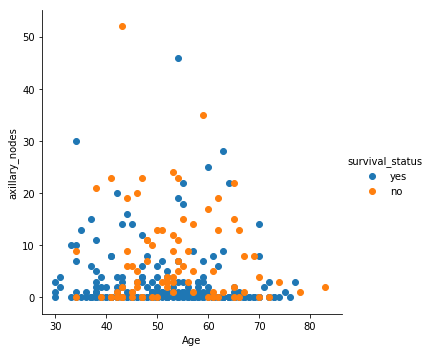

In [38]:
fig=sns.FacetGrid(df,hue="survival_status",height=5)
fig.map(plt.scatter,'Age','axillary_nodes')
fig.add_legend()
plt.show()

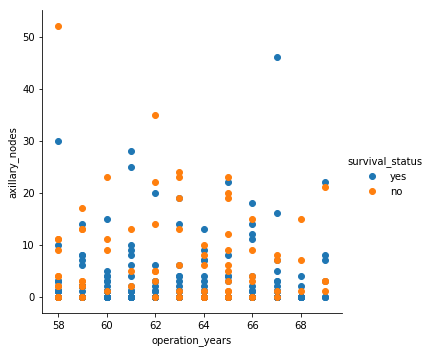

In [39]:
fig=sns.FacetGrid(df,hue="survival_status",height=5)
fig.map(plt.scatter,'operation_years','axillary_nodes')
fig.add_legend()
plt.show()

Pair plot

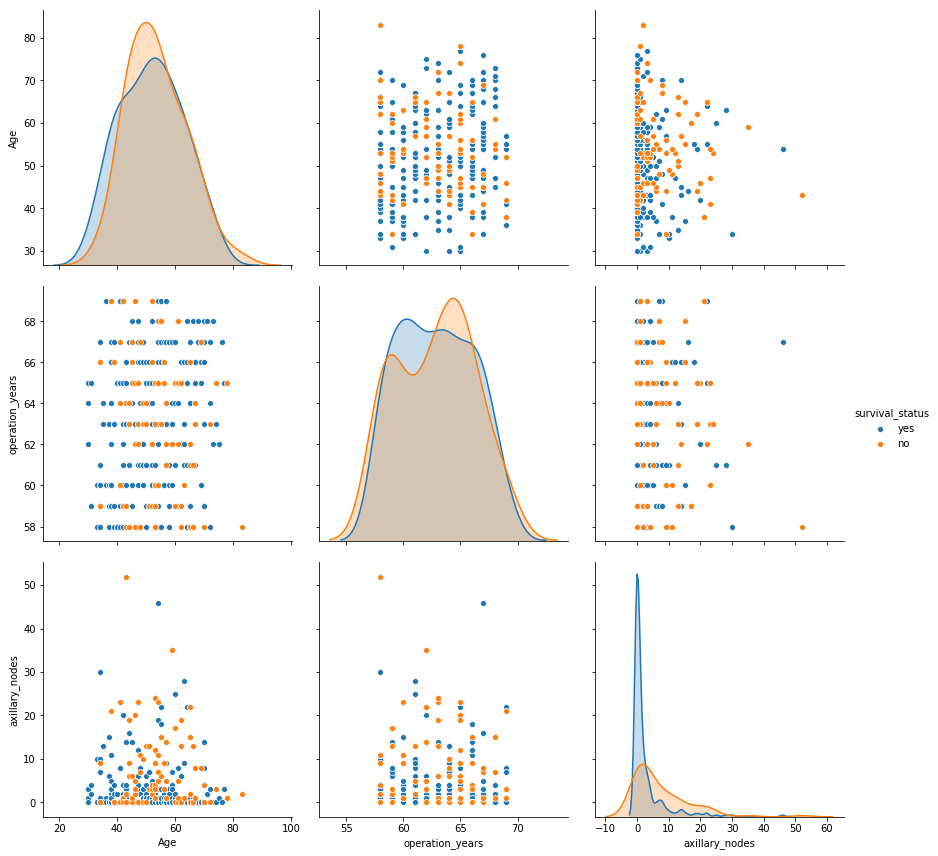

In [40]:
sns.pairplot(df, hue='survival_status', height=4)
plt.show()

# Observation

After seaing the scatter plot I can say that plot between age and axillary_nodes is better separation between the classes.

In [41]:
df.head()

,Age,operation_years,axillary_nodes,survival_status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [42]:
def class_label_mapping(x):
    if x=='yes':
        return 1
    else:
        return 0
df['survival_status']=df[['survival_status']].applymap(lambda x:class_label_mapping(x))


In [43]:
df.head(5)

,Age,operation_years,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [44]:
df.survival_status.value_counts()

1    225
0     81
Name: survival_status, dtype: int64

# Data Preprocessing

In [45]:
y=df['survival_status']
x=df.drop('survival_status',axis=1)

# train-test splitting

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,y_test)